In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("https://github.com/debashish05/Time-Series-Analysis-and-Weather-Forecast-of-Manipur/raw/main/manipur_temperature-2010-2020.csv")
data.head()

,Date (YYYY-MM-DD),Temperature (in Fahrenheit)
0,2010-01-01,57.2
1,2010-01-02,57.2
2,2010-01-03,57.2
3,2010-01-04,57.2
4,2010-01-05,59.0


In [ ]:
data.index = pd.to_datetime(data['Date (YYYY-MM-DD)'])
data.drop(columns='Date (YYYY-MM-DD)',inplace=True)
data.head()

,Temperature (in Fahrenheit)
Date (YYYY-MM-DD),
2010-01-01,57.2
2010-01-02,57.2
2010-01-03,57.2
2010-01-04,57.2
2010-01-05,59.0


In [ ]:
data.isna().sum()

Temperature (in Fahrenheit)    0
dtype: int64

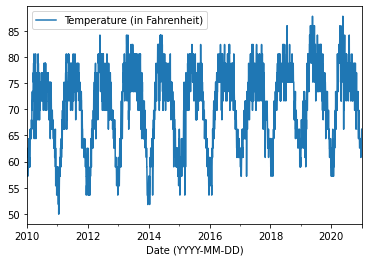

In [ ]:
data.plot()

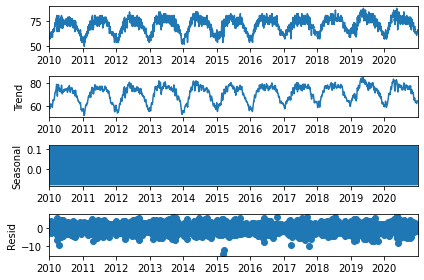

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot();

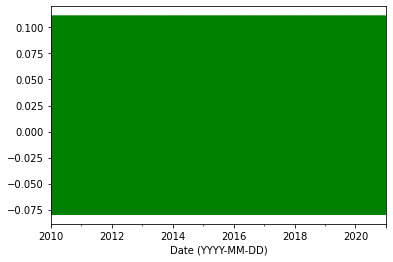

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data["Temperature (in Fahrenheit)"], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.1887888676571245
2. P-Value :  0.0006882916031504234
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3993
5. Critical Values :
	 1% :  -3.4319887450134567
	 5% :  -2.862264107905561
	 10% :  -2.567155450408488


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


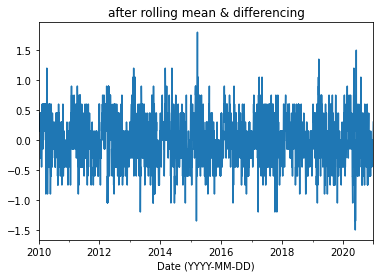

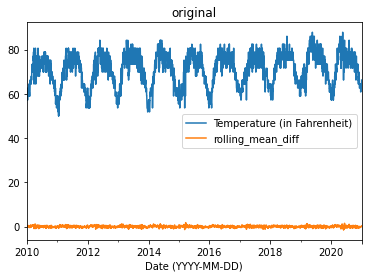

In [ ]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [ ]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -7.112030031131418
2. P-Value :  3.916519527998509e-10
3. Num Of Lags :  30
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3975
5. Critical Values :
	 1% :  -3.4319961705459843
	 5% :  -2.862267388098443
	 10% :  -2.5671571966457023


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(data['Temperature (in Fahrenheit)'],order=(1,1,1))
history=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

In [ ]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARIMA Model Results                                   
=========================================================================================
Dep. Variable:     D.Temperature (in Fahrenheit)   No. Observations:                 4017
Model:                            ARIMA(1, 1, 1)   Log Likelihood               -9012.322
Method:                                  css-mle   S.D. of innovations              2.281
Date:                           Fri, 14 Oct 2022   AIC                          18032.645
Time:                                   15:14:31   BIC                          18057.838
Sample:                               01-02-2010   HQIC                         18041.573
                                    - 12-31-2020                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0017      0.013      0.135      0.893      -0.023       0.026
ar.L1.D.Temperature (in Fahrenheit)     0.5770      0.021     27.510      0.000       0.536       0.618
ma.L1.D.Temperature (in Fahrenheit)    -0.8519      0.013    -67.512      0.000      -0.877      -0.827
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7332           +0.0000j            1.7332            0.0000
MA.1            1.1739           +0.0000j            1.1739            0.0000
-----------------------------------------------------------------------------
"""

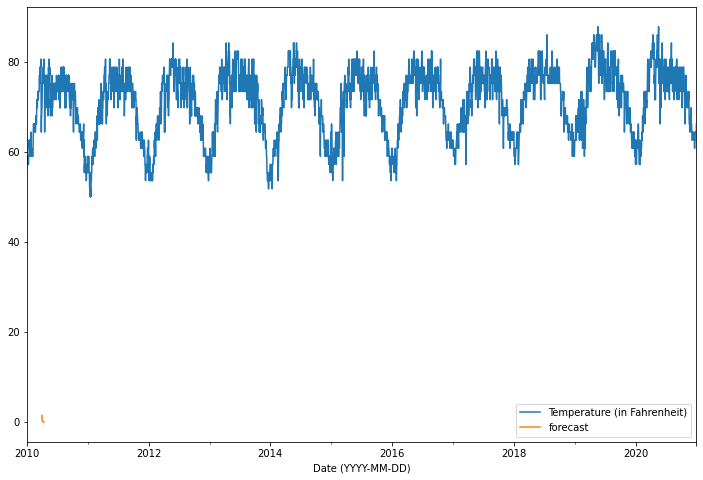

In [ ]:
data['forecast']=history.predict(start=90,end=103,dynamic=True)
data[['Temperature (in Fahrenheit)','forecast']].plot(figsize=(12,8))

In [ ]:
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

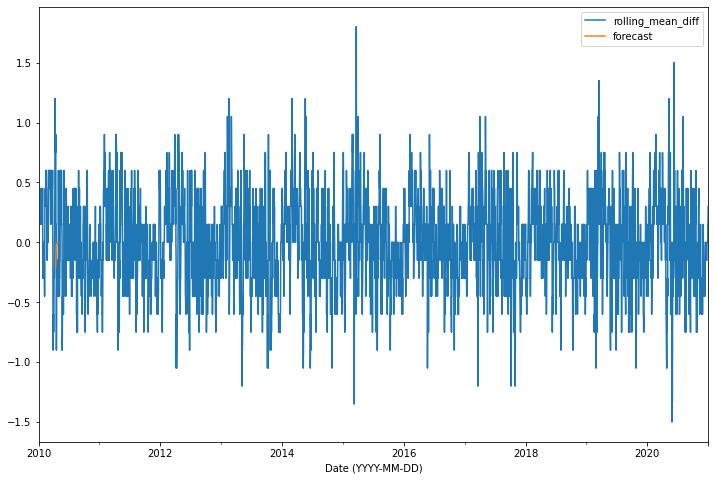

In [ ]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['rolling_mean_diff','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(data['Temperature (in Fahrenheit)'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


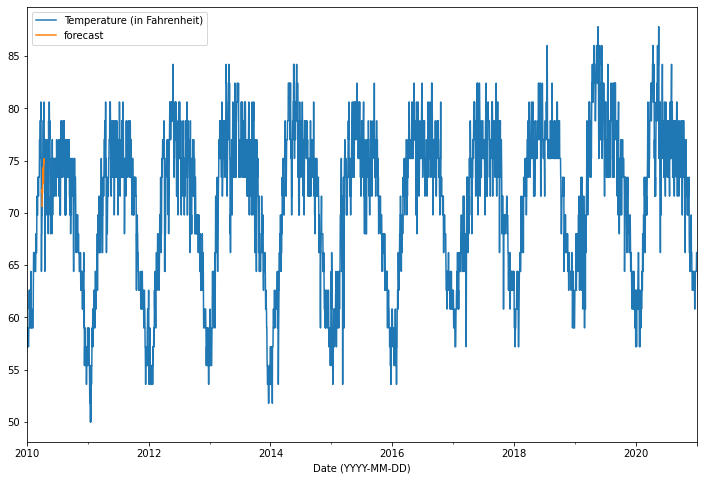

In [ ]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Temperature (in Fahrenheit)','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [ ]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,Temperature (in Fahrenheit),rolling_mean_diff,forecast
2044-12-30,NaN,NaN,NaN
2045-01-30,NaN,NaN,NaN
2045-02-28,NaN,NaN,NaN
2045-03-30,NaN,NaN,NaN
2045-04-30,NaN,NaN,NaN
2045-05-30,NaN,NaN,NaN
2045-06-30,NaN,NaN,NaN
2045-07-30,NaN,NaN,NaN
2045-08-30,NaN,NaN,NaN
2045-09-30,NaN,NaN,NaN


In [ ]:
data=pd.concat([data,pred_date])

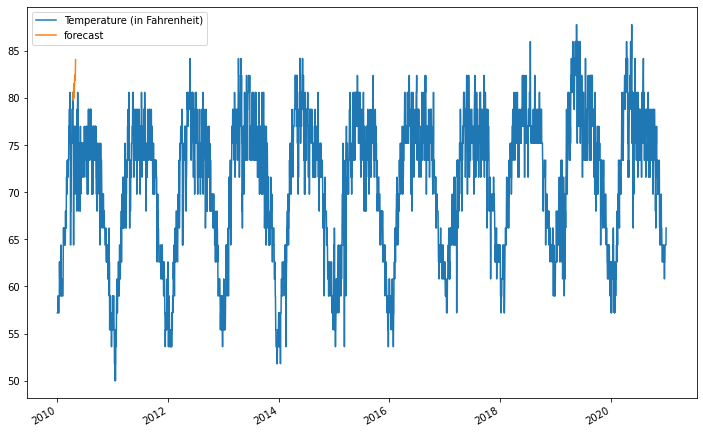

In [ ]:
data['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
data[['Temperature (in Fahrenheit)', 'forecast']].plot(figsize=(12, 8))